In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [65]:
dataset = pd.read_csv("headbrain.csv")
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [66]:
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
x = x.reshape(237,1)
y = y.reshape(237,1)
x  = np.c_[np.ones(len(x)),x]


In [67]:
iter = 5000
theta = np.array([[0, 0]]).T  # shape (3, 1)
alpha = 0.1
n = len(x)

In [68]:
for i in range(iter):
    Y_pred = x.dot(theta)
    theta = theta - (alpha / n) * (x.T.dot(x @ theta - y)) 
    Y_pred =  x.dot(theta)

## a) Best fit line found out using linear regression(without regularization)

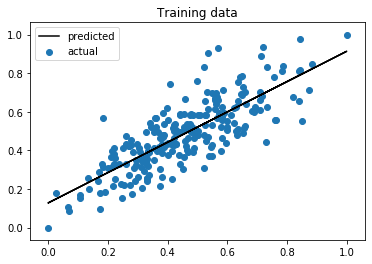

In [69]:
plt.plot(x[:,1:],Y_pred,label = "predicted",color = "black")
plt.scatter(x[:,1:],y,label = "actual")
plt.legend()
plt.title("Training data")
plt.show()

## b) Best fit line found using linear regression and L2 Regularization

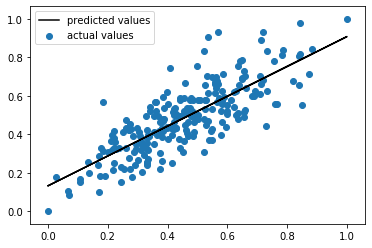

In [70]:
m = len(x)  #no. of records
n = len(x[0]) #no. of attributes+1
theta = np.empty(n).reshape(n, 1)
rmse = []
l2_param = 0.1

for i in range(iter):
    h = x @ theta
    grad = (((((h - y).T) @ x).T) + (l2_param * theta)) / m
    theta = theta - alpha * grad
    rmse.append(np.sqrt(np.sum((h - y) ** 2) / m))

plt.scatter(x[:, 1], y,label = 'actual values')
y_pred = x @ theta
plt.plot(x[:, 1], y_pred,color = 'black',label = 'predicted values')
plt.legend()
plt.show()

## c) Best fit line found using linear regression and L1 Regularization


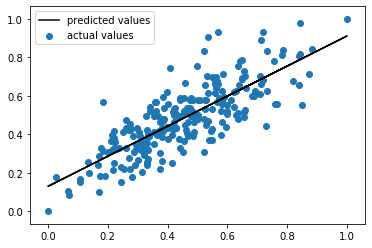

In [71]:
m = len(x)  #no. of records
n = len(x[0]) #no. of attributes+1
theta = np.empty(n).reshape(n, 1)
rmse = []
l1_param = 0.1

for i in range(iter):
    h = x @ theta
    grad = (((((h - y).T) @ x).T) + ((l1_param/2) * np.sign(theta))) / m
    theta = theta - alpha * grad
    rmse.append(np.sqrt(np.sum((h - y) ** 2) / m))

plt.scatter(x[:, 1], y,label = 'actual values')
y_pred = x @ theta
plt.plot(x[:, 1], y_pred,color = 'black',label = 'predicted values')
plt.legend()
plt.show()

## Comparisons visible between the above plots:
#### 1.The line is a bit steeper in case of regularized linear regression.
#### 2.No such visible difference is observed amongst the two regularizaion techniques.